To use lp_visu with Jupyter notebooks, you should use ~lp_visu_notebook.py~ instead of ~lp_visu.py~:

In [1]:
%matplotlib inline

from lp_visu_notebook import LPVisu

A first instantiation of LPVisu:

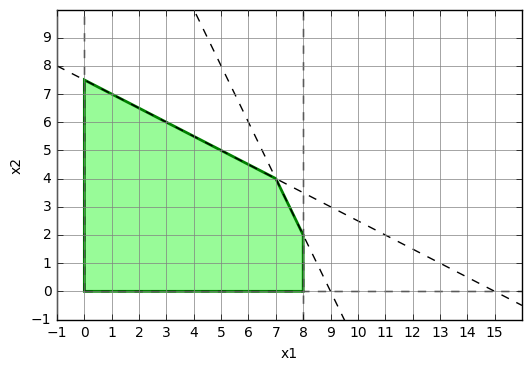

In [2]:
A = [[1.0, 0.0], [1.0, 2.0], [2.0, 1.0]]
b = [8.0, 15.0, 18.0]
c = [4.0, 3.0]

x1_bounds = (0, None)
x2_bounds = (0, None)

# GUI bounds
x1_gui_bounds = (-1, 16)
x2_gui_bounds = (-1, 10)

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds)

You can add an objective function value with the ~obj~ parameter, or draw the pivot with the ~xk~ parameter.

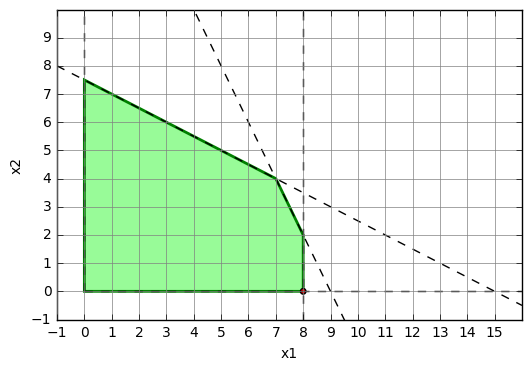

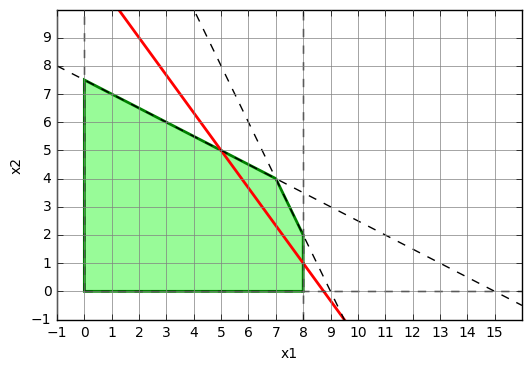

In [3]:
visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              obj=35)

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              xk=(8,0))

To avoid entering the same arguments, you can use an original LPVisu object to create another one:

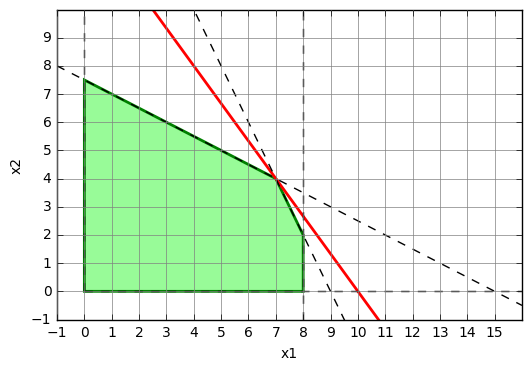

In [4]:
visu = LPVisu(original=visu, obj=40)

You can use LPVisu in callback function of ~linprog~ for instance:

Optimization terminated successfully.
         Current function value: -40.000000  
         Iterations: 3
     fun: -40.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 1.,  0.,  0.])
  status: 0
 success: True
       x: array([ 7.,  4.])


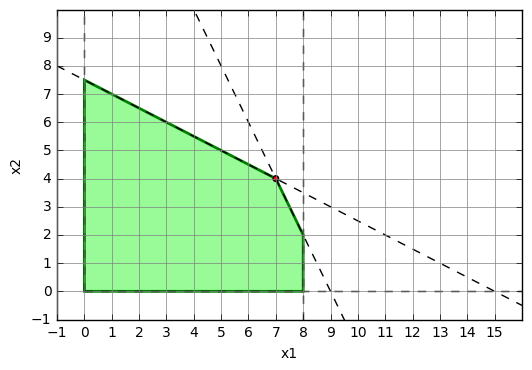


current pivot: (nan, nan)
current solution: [ 7.  4.]



current iteration: 3
current tableau: 
[[  1.           0.           0.          -0.33333333   0.66666667   7.        ]
 [  0.           0.           1.           0.33333333  -0.66666667   1.        ]
 [  0.           1.           0.           0.66666667  -0.33333333   4.        ]
 [  0.           0.           0.           0.66666667   1.66666667  40.        ]]
current indices: [0 2 1]

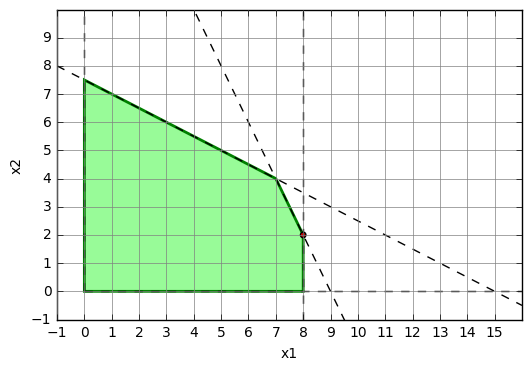


current pivot: (1, 2)
current solution: [ 8.  2.]



current iteration: 2
current tableau: 
[[  1.   0.   1.   0.   0.   8.]
 [  0.   0.   3.   1.  -2.   3.]
 [  0.   1.  -2.   0.   1.   2.]
 [  0.   0.  -2.   0.   3.  38.]]
current indices: [0 3 1]

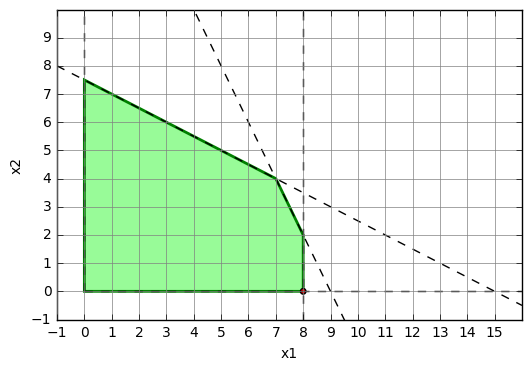

current tableau: 
[[  1.   0.   1.   0.   0.   8.]
 [  0.   2.  -1.   1.   0.   7.]
 [  0.   1.  -2.   0.   1.   2.]
 [  0.  -3.   4.   0.   0.  32.]]
current indices: [0 3 4]
current pivot: (2, 1)
current solution: [ 8.  0.]



current iteration: 1


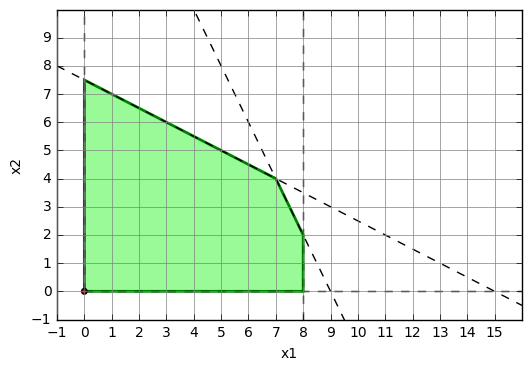

current iteration: 0
current tableau: 
[[  1.   0.   1.   0.   0.   8.]
 [  1.   2.   0.   1.   0.  15.]
 [  2.   1.   0.   0.   1.  18.]
 [ -4.  -3.   0.   0.   0.   0.]]
current indices: [2 3 4]
current pivot: (0, 0)
current solution: [ 0.  0.]



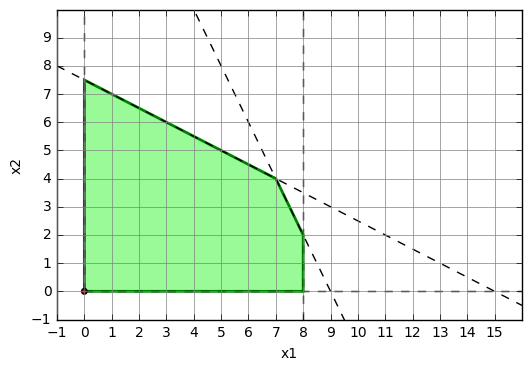

current iteration: 0
current tableau: 
[[  1.   0.   1.   0.   0.   8.]
 [  1.   2.   0.   1.   0.  15.]
 [  2.   1.   0.   0.   1.  18.]
 [ -4.  -3.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]]
current indices: [2 3 4]
current pivot: (nan, nan)
current solution: [ 0.  0.]



In [7]:
from scipy.optimize import linprog
import numpy as np

def lp_simple_callback(xk, **kwargs):
    """A simple callback function to see what is happening to print each
    step of the algorithm and to use the visualization.

    """

    print("current iteration: " + str(kwargs["nit"]))
    print("current tableau: \n" + str(kwargs["tableau"]))
    print("current indices: " + str(kwargs["basis"]))
    print("current pivot: " + str(kwargs["pivot"]))
    print("current solution: " + str(xk))
    print()

    LPVisu(original=visu, xk=xk)

# solve the problem
res = linprog(-1.0 * np.array(c), A_ub=A, b_ub=b,
              bounds=(x1_bounds, x2_bounds),
              callback=lp_simple_callback,
              options={"disp": True})

print(res)


You can use options to add cuts and draw integers points:

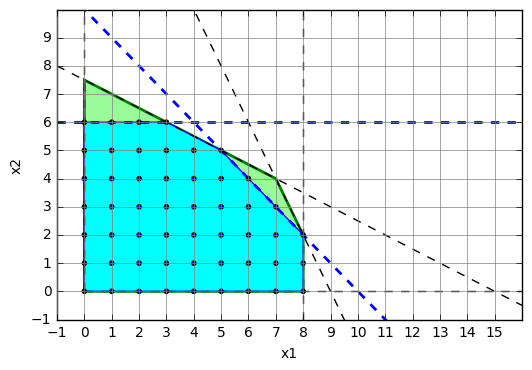

In [6]:
visu = LPVisu(original=visu, A_cuts=[[1, 1], [0, 1]], b_cuts=[10, 6], integers=True)